Exercicios Estatistica2

In [108]:
#Importação das bibliotecas

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, binom, poisson, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison


T Student

1) A média de salario dos medicos é de R$ 150 por hora, a amostra tem 12 funcionarios e um desvio padrão de 11.

In [31]:
# Qual é a probabilidade de selecionar um médico e o salário ser inferior a R$ 155 por hora

probabilidade = t.cdf(1.574591643, 11)

print(f'{round(probabilidade * 100, 2)} %')

92.82 %


In [30]:
# Qual a probabilidade do salário ser maior do que 155?

probabilidade = t.sf(1.574591643, 11)

print(f'{round(probabilidade * 100, 2)} %')

7.18 %


Distribuição Binomial



In [53]:
# Jogar uma moeda 10 vezes, qual a probabilidade de dar cara 8 vezes?

probabilidade = binom.pmf(8, 10, 0.5)

print(f'{probabilidade * 100:.2f} %')


4.39 %


In [55]:
# Tem uma prova de 10 questões, qual a probabilidade de acertar 7 questões no chute
# levando em consideração que cada questão tem 4 alternativas

probabilidade = binom.pmf(7, 10, 0.25)

print(f'{round(probabilidade * 100, 2)} %')

0.31 %


In [59]:
# Probabilidade de acertar as 10 questões chutando

probabilidade = binom.pmf(10, 10, 0.25)

print(f'{probabilidade * 100:.4f} %')

0.0001 %


Distribuição de Poisson

1) A media de infartos por dia é de 5

In [65]:
# Qual a chance de ocorrer 3 infartos em um dia

probabilidade = poisson.pmf(3, 5)

print(f'{round(probabilidade * 100, 2)} %')

14.04 %


In [72]:
# Qual a chance de ocorrer 8 infartos em um dia

probabilidade = poisson.pmf(8, 5)

print(f'{round(probabilidade * 100, 2)} %')

6.53 %


In [74]:
# Qual a chance de ocorrer 5 ou menos infartos em um dia

probabilidade = poisson.cdf(5, 5)

print(f'{round(probabilidade * 100, 2)} %')

61.6 %


In [75]:
# Qual a chande de ocorrer mais de 5 infartos em um dia

probabilidade = poisson.sf(5, 5)

print(f'{round(probabilidade * 100, 2)} %')

38.4 %


Qui Quadrado

In [81]:
Matriz = np.array([[100, 98], [55, 30]])
Matriz

array([[100,  98],
       [ 55,  30]])

In [83]:
chi2_contingency(Matriz)

# O pvalue é menor que 0.05 logo temos evidências para recusar a hipotese nula

Chi2ContingencyResult(statistic=4.284956678831726, pvalue=0.038451062423205534, dof=1, expected_freq=array([[108.44522968,  89.55477032],
       [ 46.55477032,  38.44522968]]))

Anova

In [127]:
# Carregamento dos dados

dados = pd.read_csv('anova.csv', sep =';')
dados.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


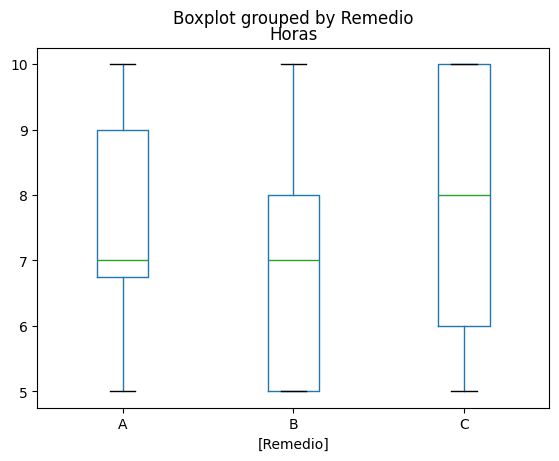

In [134]:
# Gerando boxplot dos dados
dados.boxplot(by = 'Remedio', grid = False)
plt.show()


In [135]:
# Crianção de modelo de regressão linear

modelo = ols('Horas ~ Remedio', data= dados).fit()
resultado_modelo = sm.stats.anova_lm(modelo)
resultado_modelo

#Podemos observar que o valor de p é maior que 0,05 logo não podemos afirmar que não há diferença significativa entre cada grupo.

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN
